# Access to WMS data

The CEDA data server at <https://data.cci.ceda.ac.uk/> provides access via the OGC Web Map Service (WMS) to CCI datasets. This notebook demonstrates how to retrieve CCI data via WMS from the CEDA server, using [OWSLib](https://www.osgeo.org/projects/owslib/) as the client.

If `owslib` is not already installed in the Python environment, uncomment the following cell to install it with mamba.

In [1]:
# ! mamba install --yes owslib

Import some required libraries, including OWSLib as the WMS client.

In [2]:
from owslib.wms import WebMapService
from esa_climate_toolbox.core import list_ecvs, list_ecv_datasets
from IPython.display import Image

<frozen abc>:106: FutureWarning: xarray subclass VectorDataCube should explicitly define __slots__


List the available ECVs.

In [3]:
list_ecvs()

['CLOUD',
 'OZONE',
 'VEGETATION',
 'OC',
 'SEALEVEL',
 'LST',
 'LAKES',
 'BIOMASS',
 'RD',
 'ICESHEETS',
 'SEASURFACESALINITY',
 'SNOW',
 'FIRE',
 'AEROSOL',
 'SOILMOISTURE',
 'LC',
 'SST',
 'SEAICE',
 'WATERVAPOUR',
 'GHG',
 'SEASTATE',
 'PERMAFROST']

List the available datasets for the cloud ECV.

In [4]:
print("\n".join(map(lambda x: x[0], list_ecv_datasets("CLOUD"))))

esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.2-0.r1
esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.2-0.r1
esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.ATSR2-AATSR.3-0.r1
esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-AM.3-0.r1
esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-PM.3-0.r1
esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.MERIS-AATSR.2-0.r1


Select a dataset from the list and store its name in a variable for use in the following steps.

In [5]:
ds_id = "esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.ATSR2-AATSR.3-0.r1"

Create a local representation of the WMS service for the selected dataset.

In [6]:
wms_url = f"https://data.cci.ceda.ac.uk/thredds/wms/{ds_id}?service=WMS&version=1.3.0"
wms = WebMapService(wms_url, version="1.3.0", timeout=600)

List the data variables available from this service.

In [7]:
list(wms.contents)

['nday',
 'nday_low',
 'nday_mid',
 'nday_hig',
 'nobs',
 'nobs_day',
 'nobs_clear_day',
 'nobs_cloudy_day',
 'nobs_clear_night',
 'nobs_cloudy_night',
 'nobs_clear_twl',
 'nobs_cloudy_twl',
 'nobs_cloudy',
 'nretr_clear',
 'nretr_cloudy',
 'toa_swup',
 'toa_swdn',
 'toa_swup_clr',
 'toa_lwup',
 'toa_lwup_clr',
 'toa_swup_low',
 'toa_swup_mid',
 'toa_swup_hig',
 'toa_lwup_low',
 'toa_lwup_mid',
 'toa_lwup_hig',
 'boa_swup',
 'boa_swup_clr',
 'boa_lwup',
 'boa_lwup_clr',
 'boa_swdn',
 'boa_swdn_clr',
 'boa_lwdn',
 'boa_lwdn_clr',
 'cee',
 'cee_corr_unc',
 'cee_prop_unc',
 'cee_std',
 'cee_unc',
 'cer',
 'cer_corr_unc',
 'cer_ice',
 'cer_ice_corr_unc',
 'cer_ice_prop_unc',
 'cer_ice_std',
 'cer_ice_unc',
 'cer_liq',
 'cer_liq_corr_unc',
 'cer_liq_prop_unc',
 'cer_liq_std',
 'cer_liq_unc',
 'cer_prop_unc',
 'cer_std',
 'cer_unc',
 'cfc',
 'cfc_corr_unc',
 'cfc_day',
 'cfc_high',
 'cfc_low',
 'cfc_mid',
 'cfc_night',
 'cfc_prop_unc',
 'cfc_std',
 'cfc_twl',
 'cfc_unc',
 'cla_vis006',
 'cla

Select the `iwp` (ice water path) variable from the list and store its name in a variable.

In [8]:
data_id = "iwp"

Check the bounding box for the selected dataset and variable; we can see that it is of global extent.

In [9]:
wms.contents[data_id].boundingBox

(-179.75, -89.75, 179.75, 89.75, 'CRS:84')

Check what times are available, filtering to the year 2011.

In [10]:
[t for t in wms[data_id].timepositions if t.startswith("2011")]

['2011-01-01T00:00:00.000Z',
 '2011-02-01T00:00:00.000Z',
 '2011-03-01T00:00:00.000Z',
 '2011-04-01T00:00:00.000Z',
 '2011-05-01T00:00:00.000Z',
 '2011-06-01T00:00:00.000Z',
 '2011-07-01T00:00:00.000Z',
 '2011-08-01T00:00:00.000Z',
 '2011-09-01T00:00:00.000Z',
 '2011-10-01T00:00:00.000Z',
 '2011-11-01T00:00:00.000Z',
 '2011-12-01T00:00:00.000Z']

Request a map for the chosen dataset and variable from the WMS server, selecting a time from the list above and a bounding box covering latitudes from 80°S to 50°N, then display the map in the notebook.

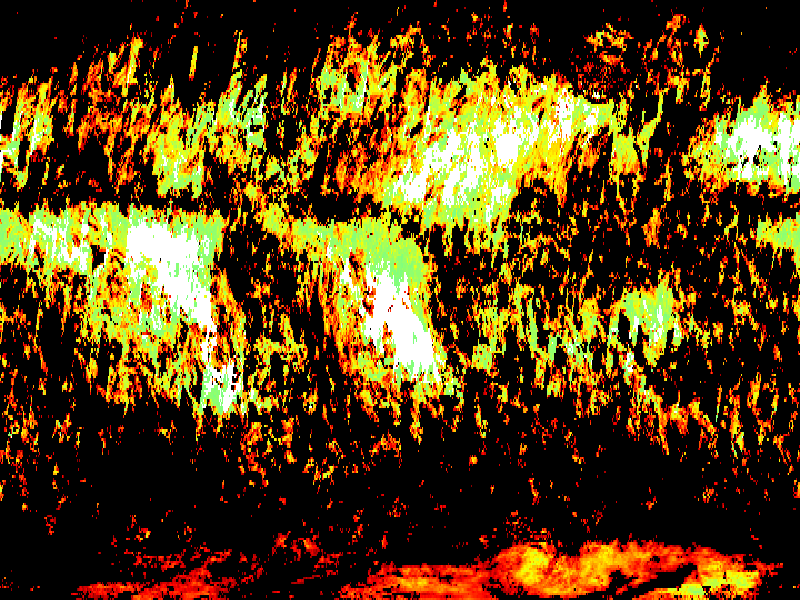

In [11]:
response = wms.getmap(
    layers=["iwp"],
    styles=["boxfill/rainbow"],
    size=[800, 600],
    srs="EPSG:4326",
    bbox=[-180.0, -80.0, 180.0, 50.0],
    format="image/png",
    time="2011-12-01T00:00:00.000Z"
)

Image(response.read())